In [35]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [36]:
# loading
y = np.genfromtxt('./data/label.csv',delimiter=',')

In [37]:
X = np.genfromtxt('./data/features.csv',delimiter=',')

In [38]:
y = tf.convert_to_tensor(y, dtype='float32')

In [39]:
X =tf.convert_to_tensor(X, dtype='float32')

In [40]:
#splitting
split_index = int(0.8 * len(X))
data_train = tf.data.Dataset.from_tensor_slices(
    (X[:split_index], y[:split_index])

).cache()

data_validate = tf.data.Dataset.from_tensor_slices(
    (X[split_index:], y[split_index:])).cache()

In [41]:
X[0].shape

TensorShape([18])

In [44]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(18, 1, 1)))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(data_train.shuffle(10000).batch(32), epochs=5, validation_data=data_validate.batch(32))

Epoch 1/5
375/375 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.8270 - val_loss: 0.9215 - val_accuracy: 0.4763
Epoch 2/5
375/375 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8343 - val_loss: 0.8720 - val_accuracy: 0.4933
Epoch 3/5
375/375 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8617 - val_loss: 0.8362 - val_accuracy: 0.5873
Epoch 4/5
375/375 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8613 - val_loss: 0.7812 - val_accuracy: 0.5793
Epoch 5/5
375/375 [==============================] - 0s 1ms/step - loss: 0.3519 - accuracy: 0.8544 - val_loss: 0.7406 - val_accuracy: 0.5823


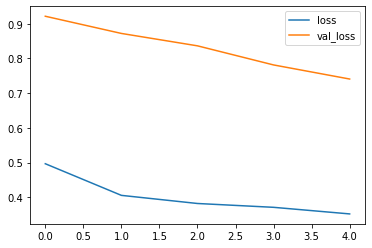

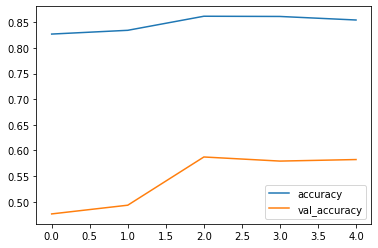

In [46]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()